In [47]:
from labs import *

# Лабораторная работа 3.1.3: Измерение магнитного поля Земли

Выполнил: Воробьев Игорь

## Цель работы:
Определить характеристики шарообразных неодимовых магнитов и, используя законы взаимодействия магнитных моментов с полем, измерить горизонтальную и вертикальную составляющие индукции магнитного поля Земли и магнитное наклонение.

## Оборудование:
12 одинаковых неодимовых магнитных шариков, тонкая нить для изготовления крутильного маятника, медная проволока диаметром ($0,5 - 0,6$) мм, электронные весы, секундомер, измеритель магнитной индукции АТЕ-8702, штангенциркуль, брусок из немагнитного материала ($25\times30\times60$ мм$^3$), деревянная линейка, штатив из немагнитного материала; дополнительные неодимовые магнитные шарики ($\sim$ 20 шт.) набор гирь и разновесов.

## Теория
Теоретическая справка:
Точечный магнитный диполь:
Простейший магнитный диполь может быть образован витком с током или постоянным магнитом. По определению, магнитный момент $\vec{P_m}$ тонкого витка площадью $S$ с током $I$ равен:
\begin{equation*}
\vec{P_m} = \dfrac{I}{c}\vec{S} = \dfrac{I}{c} S \vec{n}
\end{equation*} 
где $c$ – скорость света в вакууме, $\vec{S} = S \vec{n}$ — вектор площади контура, образующий с направлением тока правовинтовую систему, $\vec{n}$ --- единичный вектор нормали к площадке $S$ (это же направление $\vec{P}_m$ принимается за направление $S \to N$ от южного ($S$) к северному ($N$) полюсу). Если размеры контура с током или магнитной стрелки малы по сравнению расстоянием до диполя, то соответствующий магнитный диполь $\vec{P}_m$ называют элементарным или точечным.

Поле точечного диполя определяется по следующей формуле:
\begin{equation*}
\vec{B} = \dfrac{3\left(\vec{P_m}, \vec{r}\right)\vec{r}}{r^5} - \dfrac{\vec{P}_m}{r^3}
\end{equation*}
В магнитном поле с индукцией $\vec{B}$ на точечный магнитный диполь $\vec{P}_m$ действует механический момент сил:
\begin{equation*}
\vec{M} = \left[\vec{P_m}, \vec{B}\right]
\end{equation*}
Под действием вращающего момента $\vec{M}$ виток с током или постоянный магнит поворачивается так, чтобы его магнитный момент выстроился вдоль вектора индукции магнитного поля. Это --- положение устойчивого равновесия: при отклонении от этого положения возникает механический момент внешних сил, возвращающий диполь к положению равновесия. В положении, когда $\vec{P_m}$ и $\vec{B}$ параллельны, но направлены противоположно друг другу, также имеет место равновесие ($M = 0$), но такое равновесие неустойчиво: малейшее отклонение от этого положения приведёт к появлению момента сил, стремящихся отклонить диполь ещё дальше от начального положения.

Магнитный диполь в магнитном поле обладает энергией:
\begin{equation*}
W = -\left(\vec{P_m}, \vec{B}\right)
\end{equation*}

Неодимовые магниты:

В настоящей работе используются неодимовые магниты шарообразной формы.
Для нас важно то, что:

 шары намагничены однородно;
 
 вещество, из которого изготовлены магниты, является магнитожёстким материалом.

Внутри такого шара магнитное поле равно 
\begin{equation}
B_0 = \dfrac{2P_m}{R^3}
\end{equation}
Полный магнитный момент $\vec{P_m}$ постоянного магнита определяется намагниченностью $\vec{p_m}$ вещества, из которого он изготовлен. По определению, намагниченность --- это магнитный момент единицы объёма. Для однородно намагниченного шара намагниченность, очевидно, равна:
\begin{equation}
\vec{p_m} = \dfrac{\vec{P_m}}{V}
\end{equation}
Намагниченность — важная характеристика вещества постоянных магнитов, определяющая, в частности, величину остаточной магнитной индукции $B_r = 4 \pi p_m$ (остаточная индукция $B_r$ --- одна из величин, которая, как правило, указывается в справочниках по магнитожёстким материалам).
\begin{equation}
\vec{B_P} = \dfrac{8\pi}{3}\vec{p_m} = \dfrac{2}{3} \vec{B_r}
\end{equation}
### Экспериментальное определение величины магнитного момента магнитных шариков
$P_m$ можно определить из параметров шарика и из расстояния $r_{max}$, на котором они удерживаются в поле тяжести.
\begin{equation}
P_m = \sqrt{\dfrac{mgr_{max}^4}{6}}
\end{equation}

$$\vec{B_p} = \dfrac{2\vec{P_m}}{R^3}$$

Определение величины магнитного момента по силе сцепления магнитных шариков:
Если сила сцепления двух одинаковых шаров равна 
\begin{equation}
F_0 = \dfrac{6P_m^2}{d^4} \Rightarrow P_m = \sqrt{\dfrac{F_0d^4}{6}}
\end{equation}
то минимальный вес цепочки, при которой она оторвется от верхнего шарика равен:
\begin{equation}
F \approx 1,08F_0
\end{equation}
Измерение горизонтальной составляющей индукции магнитного поля Земли:


При отклонении "стрелки" на угол $\theta$ от равновесного положения в горизонтальной плоскости возникают крутильные колебания вокруг вертикальной оси, проходящей через середину стрелки. Если пренебречь упругостью нити, то уравнение крутильных колебаний такого маятника определяется возвращающим моментом сил $M = -P_0B_h \sin \theta$, действующим на "стрелку" со стороны магнитного поля Земли, и моментом инерции $I_n$ "стрелки" относительно оси вращения.\\
При малых амплитудах:
$$[T = 2\pi \sqrt{\dfrac{I_n}{nP_mB_h}}]$$
Пусть 
$$[T(n) = kn \Rightarrow]$$

$$k = \pi \sqrt{\dfrac{md^2}{3P_m B_h}} \Rightarrow B_h = \dfrac{\pi^2md^2}{3k^2P_m}$$

Измерение вертикальной составляющей индукции магнитного поля Земли. Магнитное наклонение.:

С помощью небольшого дополнительного грузика "стрелку" можно "выровнять", расположив её горизонтально: в этом случае момент силы тяжести груза относительно точки подвеса будет равен моменту сил, действующих на "стрелку" со стороны магнитного поля Земли. Если масса уравновешивающего груза равна $m$, плечо силы тяжести $r$, а полный магнитный момент "стрелки" $P_0 = nP_m$, то в равновесии:
$$[mgr = P_0 B_v = nP_mB_v]$$
Пусть $M(n) = An \Rightarrow$

$$B_v = \dfrac{A}{P_m}$$

### Задание 1

Введем данные с погрешностями в формате Value(величина, погрешность):

In [48]:
N = 20
m0 = Value(8.310, err=0.001) * 10 ** (-3)
M = Value(25.089, err=0.001) * 10 ** (-3)
msh = (M - m0) / N
D = Value(11.6 / 20, err=0.05 / 20) * 10 ** (-2)
Rmax = Value(1.6, err=0.05) * 10 ** (-2)

(1.6±0.1e-2)


Воспользуемся формалами и получим исхомые величины с погрешностями:

In [49]:
Pm = Rmax ** 2 * (msh * g / 6) ** 0.5
pm = Pm / (pi * (D / 2) ** 3 * 4 / 3)
Bp = (8 * pi / 3) * pm
Br = 1.5 * Bp
print(f'Магнитный момент шарика = {Pm}')
print(f'Намагниченность материала шарика = {pm}')
print(f'Магнитное поле на полюсах шариков = {Bp}')
print(f'Остаточная магнитная индукция = {Br}')

Магнитный момент шарика = (9.5±0.6e-6)
Намагниченность материала шарика = (93.0±6.0)
Магнитное поле на полюсах шариков = (780.0±50.0)
Остаточная магнитная индукция = (1.2±0.1e3)


### Задание 2

Запишем полученные в ходе эксперимента данные:

In [50]:
df = pd.read_csv("data3.1.3_2.csv", index_col="Unnamed: 0")
df.t = df.t.transform(const_err(0.5))
df.t = df.t / df.n
df

,N,n,t
0,11,10,(4.42±0.05)
1,10,10,(3.9±0.05)
2,9,10,(3.5±0.1)
3,8,10,(3.1±0.1)
4,7,10,(2.79±0.05)
5,6,10,(2.41±0.05)
6,5,10,(2.1±0.1)
7,4,10,(1.7±0.1)


Вытащим параметры лианеризации через МНК:

((0.38±0.01), (0.1±0.06))

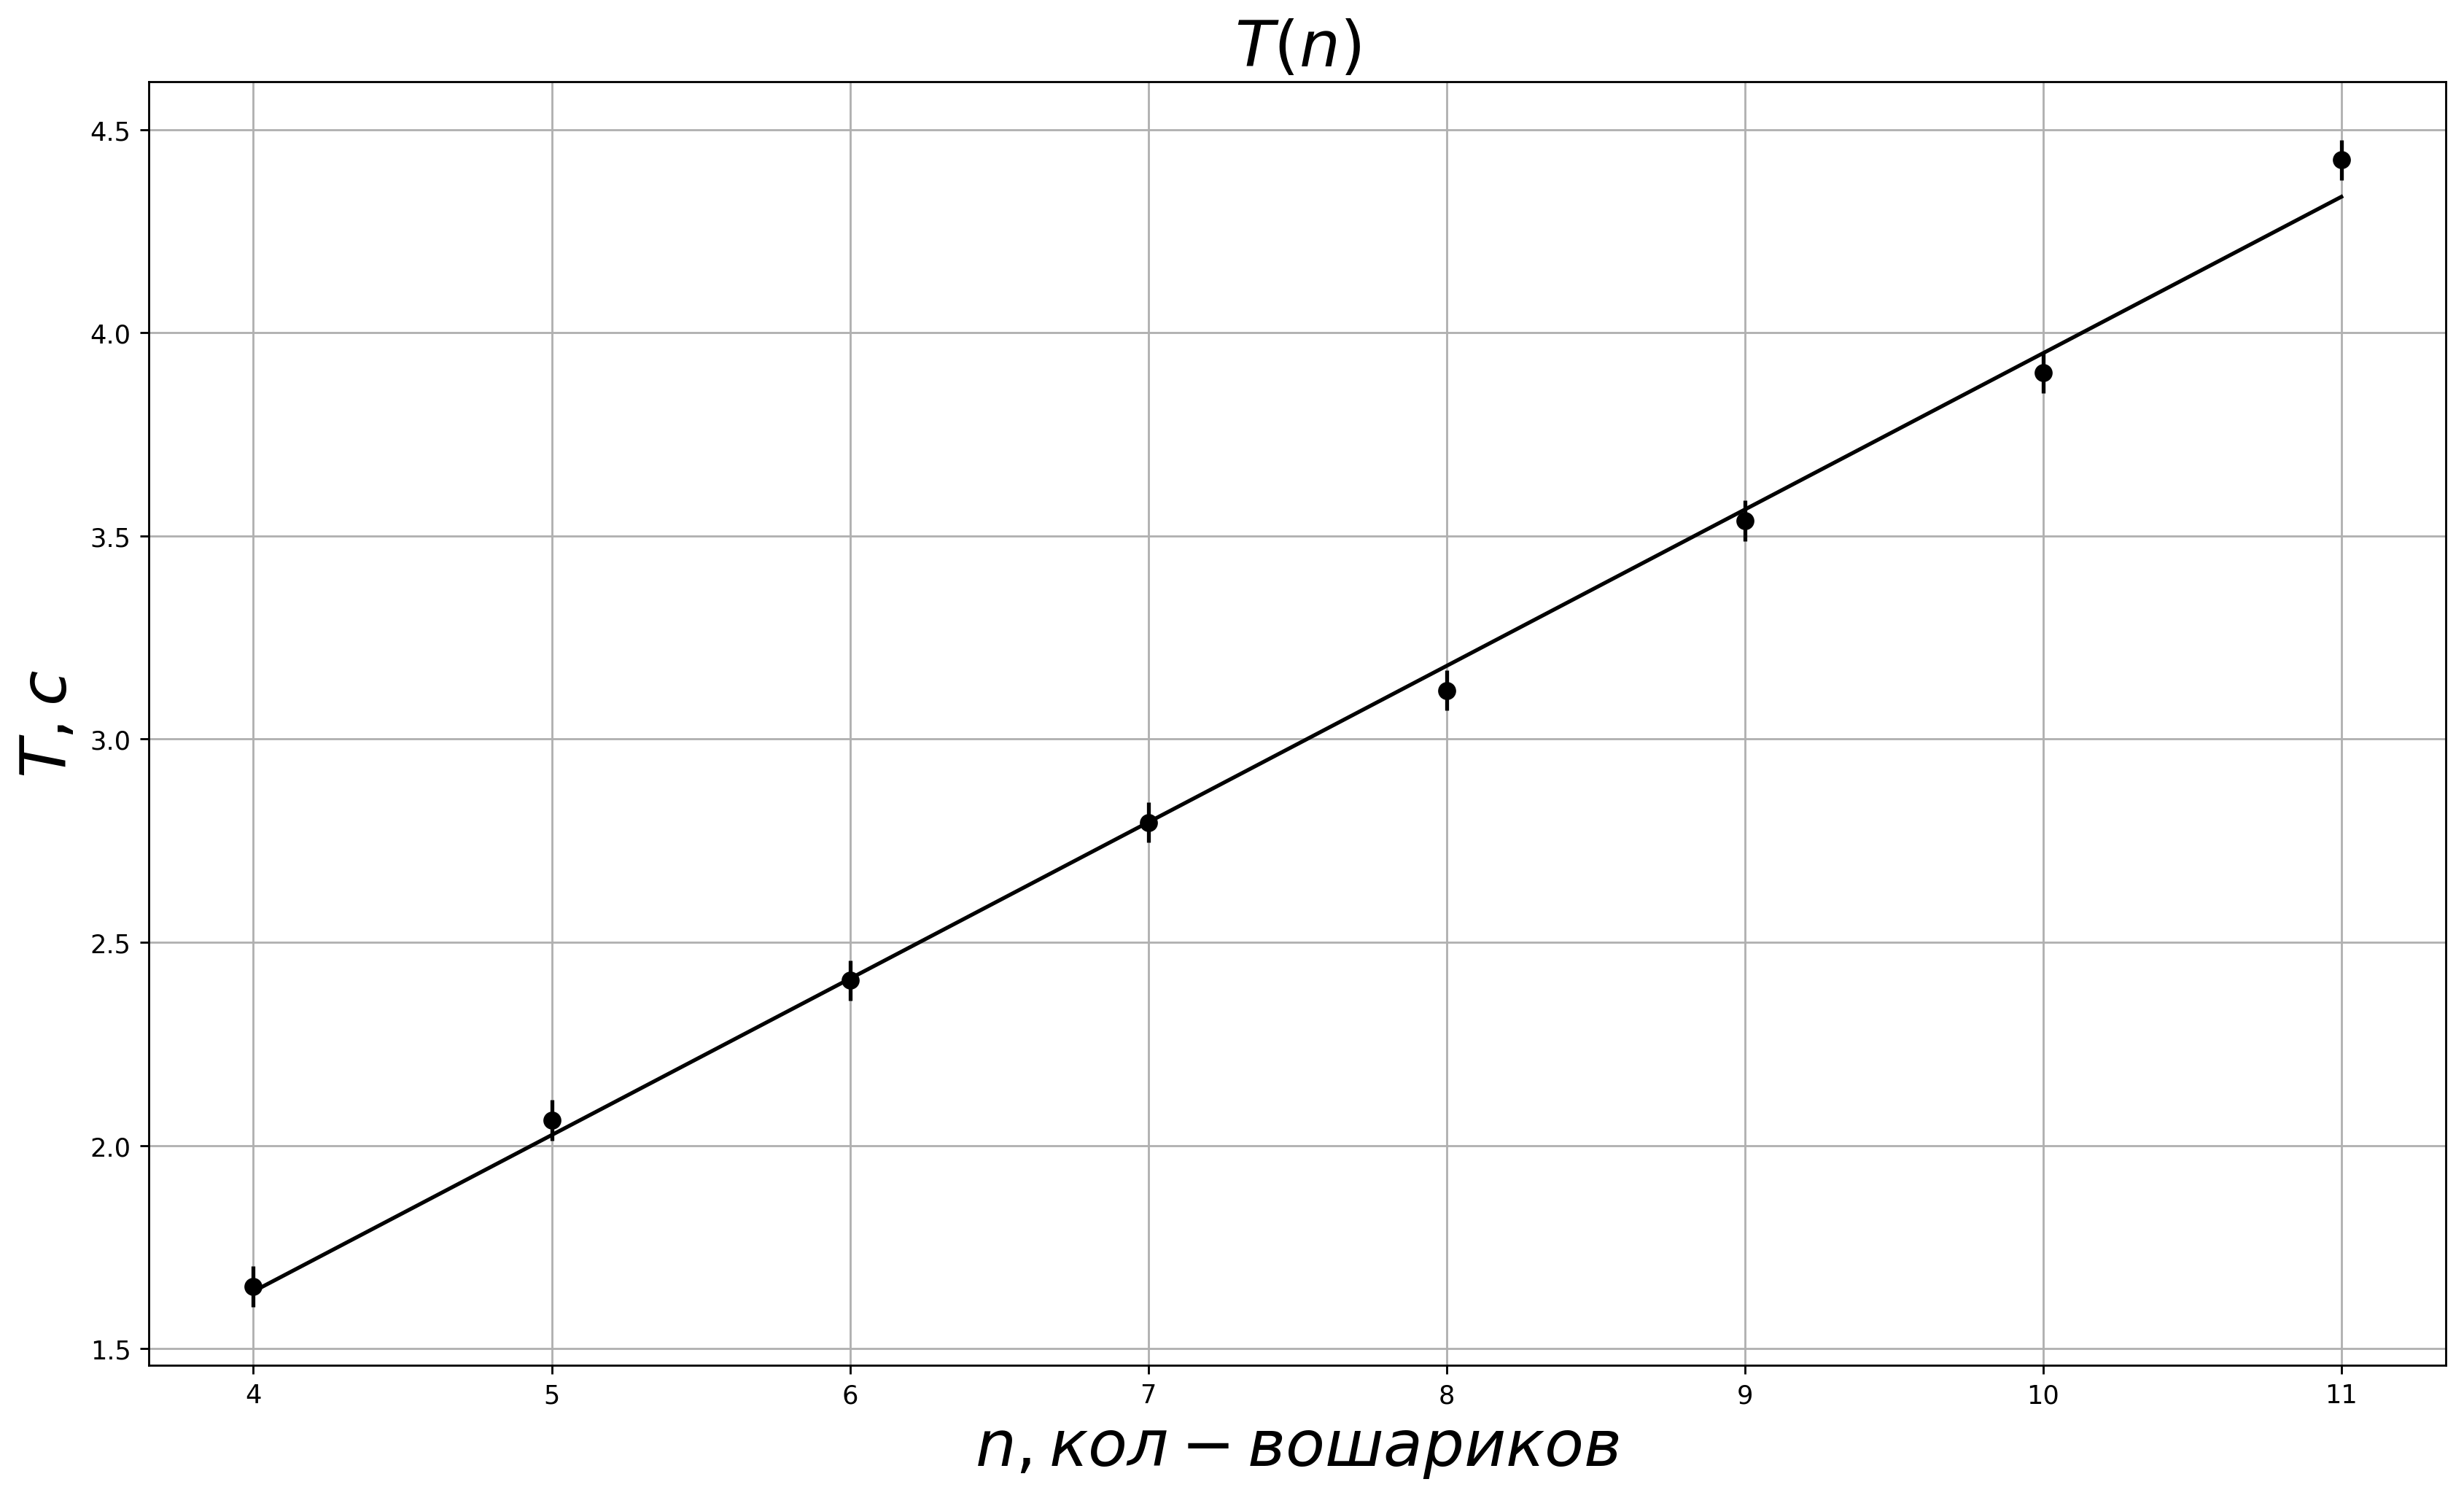

In [51]:
k, b = errorbar(df.N, df.t, r'$T(n)$', r'$n, кол-во шариков$', r'$T, с$')
k, b

Воспользуемся формалами и получим исходную величины с погрешностями:

In [52]:
Bh = pi ** 2 * msh * D ** 2 / (3 * k ** 2 * Pm)
print(f'Горизонтальная составляющая магнитного поля земли = {Bh}')

Горизонтальная составляющая магнитного поля земли = (6.6±0.5e-2)


### Задание 3

Зафиксируем полученные в ходе эксперимента данные:

In [53]:
MotN = pd.read_csv("data3.1.3_3.csv", index_col="Unnamed: 0")
MotN.dm = MotN.dm.transform(const_err(0.01)) * 10 ** (-1)
MotN["M"] = MotN.dm * g * ((MotN.N / 2) - 1) * D
MotN

,N,m,dm,M
0,8,8.432,(1.7±0.1e-2),(2.9±0.2e-3)
1,6,8.389,(1.3±0.1e-2),(1.5±0.1e-3)
2,4,8.337,(7.6±1.0e-3),(4.3±0.6e-4)


Вытащим параметры лианеризации через МНК:

((6.2±0.6e-4), (-2.1±0.4e-3))

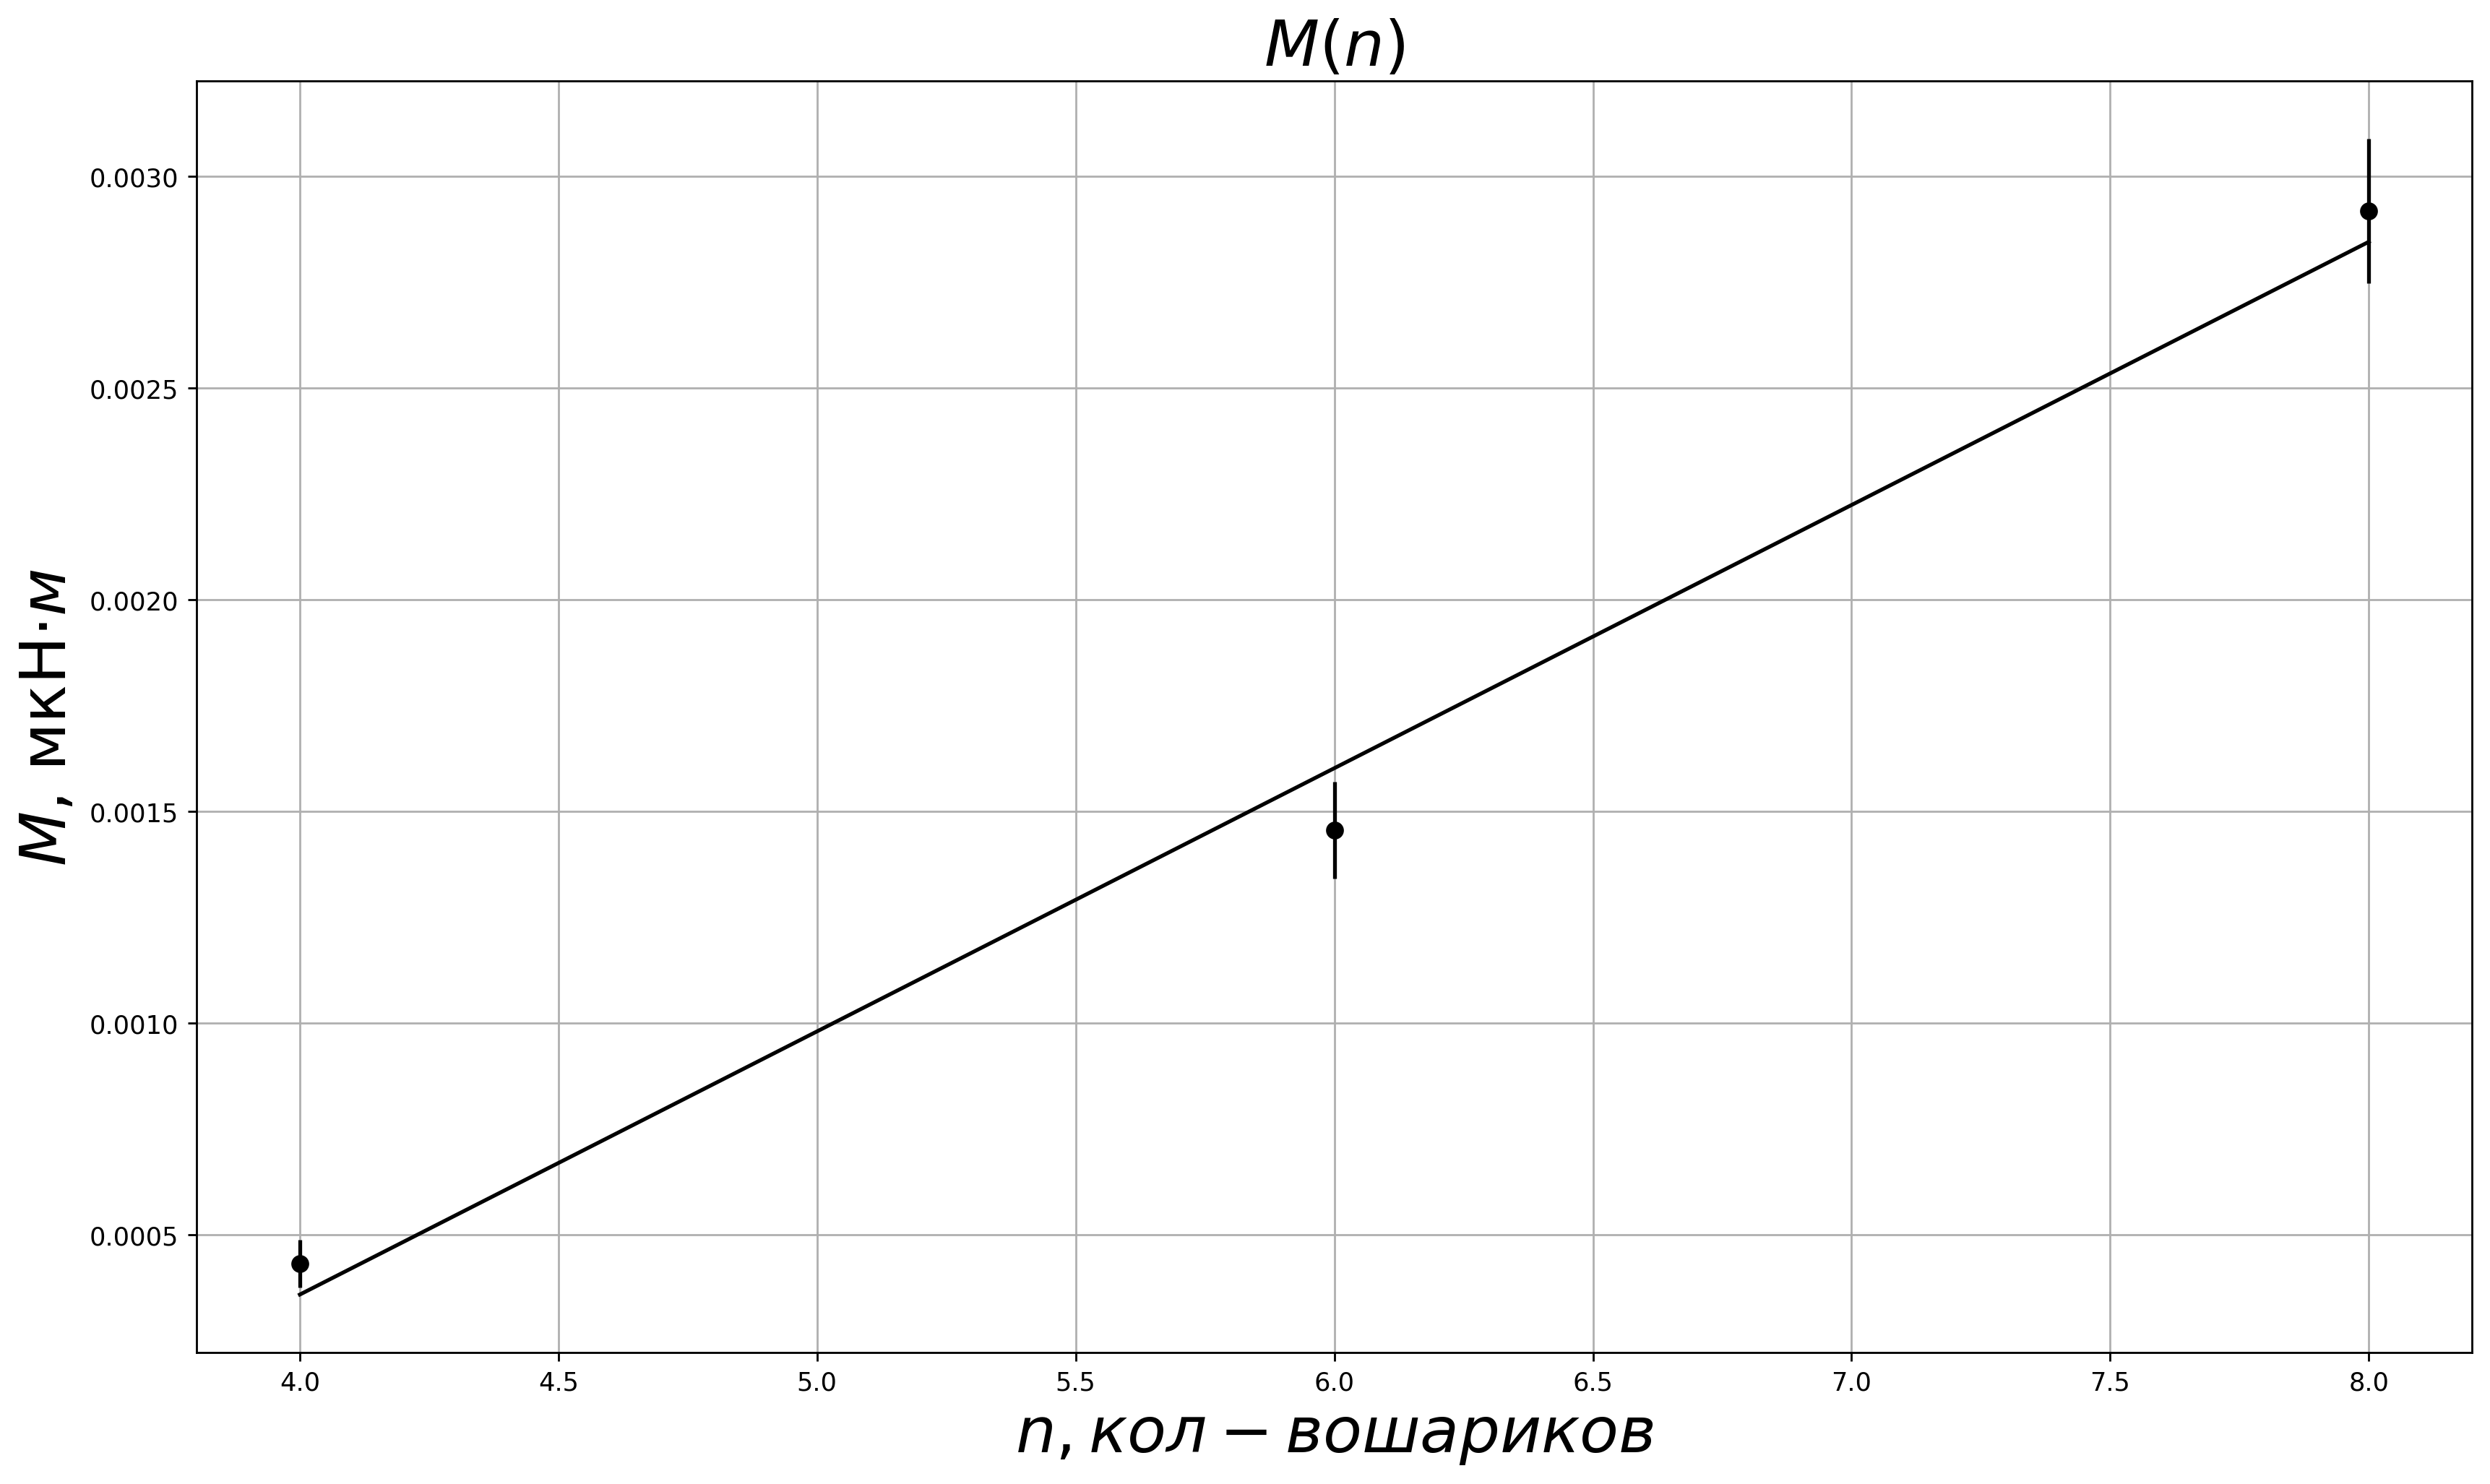

In [54]:
k, b = errorbar(MotN.N, MotN.M, r'$M(n)$', r'$n, кол-во шариков$', r'$M$, мкН$\cdotм$')
k, b

In [55]:
Bv = k / Pm
print(f'Величина магнитного поля Земли = {(Bh ** 2 + Bv ** 2) ** 0.5}')

Величина магнитного поля Земли = (66.0±8.0) Тл


## Вывод


По графику видно, что данные плохо ложатся на прямую даже в пределах погрешности. Это обусловлено тем, что набор возможных грузов и, соответственно, моментов дискретен и не может быть подобран более точно, из-за чего и выбивается из теоретической погрешности.
По наклону фитирующей прямой была вычеслена вертикальная компонента магнитного поля земли.